In [3]:
import os
import pandas as pd
import scipy.stats as linregress
import scipy as sts
import scipy.stats as st
import seaborn as sns
import numpy as np
import pylab as pl
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from matplotlib.ticker import FuncFormatter
import datetime as datetime
import gmaps
import requests 
import json
%matplotlib notebook

In [17]:
world_df= pd.read_csv("../Resources/owid-covid-data.csv")
updated_world_df=world_df.drop(["iso_code","new_deaths_per_million","total_tests","new_tests",
                                "new_tests_smoothed_per_thousand","population","median_age","aged_70_older",
                                "extreme_poverty","female_smokers","male_smokers",
                               "handwashing_facilities","hospital_beds_per_thousand","life_expectancy",
                               "new_tests_smoothed","new_tests_per_thousand","tests_units",
                               "new_deaths","new_cases_per_million"], axis=1)
updated_world_df=updated_world_dfupdated_world_df=updated_world_df.rename(columns={"location":"Country", "continent":"Continent","date":"Date",
                                                    "total_cases":"Total Cases", "new_cases":"New Cases",
                                                    "total_cases_per_million": "Total Cases Per Million",
                                                  "total_deaths_per_million":"Total Deaths Per Million",
                                                  "total_tests_per_thousand":"Total Test Per Thousands",
                                                 "population_density":"Population Density","aged_65_older":"Aged 65 or older",
                                                 "gdp_per_capita":"GDP Per Capita","cvd_death_rate":"Covid Death Rate",
                                                 "stringency_index":"Stringency Index","total_deaths":"Total Deaths"})
updated_world_df.head()



















,Continent,Country,Date,Total Cases,New Cases,Total Deaths,Total Cases Per Million,Total Deaths Per Million,Total Test Per Thousands,Stringency Index,Population Density,Aged 65 or older,GDP Per Capita,Covid Death Rate,diabetes_prevalence
0,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,NaN,NaN,54.422,2.581,1803.987,597.029,9.59
1,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,NaN,0.0,54.422,2.581,1803.987,597.029,9.59
2,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,NaN,0.0,54.422,2.581,1803.987,597.029,9.59
3,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,NaN,0.0,54.422,2.581,1803.987,597.029,9.59
4,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,NaN,0.0,54.422,2.581,1803.987,597.029,9.59


In [18]:
#Number Hospital Beds is based on the lastest year per Country

data = pd.read_csv("../Resources/data.csv")

who_df = data.iloc[data.groupby("Country")["Year"].agg(pd.Series.idxmax)]
who_df.reset_index(drop=True).set_index("Country")
who_df=who_df.rename(columns={"Hospital beds (per 10 000 population)":"Hospital Beds (per 10K people)"})
hospital_beds_df=who_df.drop(["Year"], axis=1)

hospital_beds_df.head()

,Country,Hospital Beds (per 10K people)
0,Afghanistan,5
16,Albania,29
29,Algeria,19
31,Angola,8
32,Antigua and Barbuda,38


In [19]:
#Smoking Percentage is based on the lastest year per Country

smokingdata = pd.read_csv("../Resources/smokingdata.csv")

smokingdata_df = smokingdata.iloc[smokingdata.groupby("Country")["Year"].agg(pd.Series.idxmax)]

clean_smoking_data = smokingdata_df.drop(["Estimate of current cigarette smoking prevalence (%).1", "Estimate of current cigarette smoking prevalence (%).2", 
                                       "Estimate of current tobacco smoking prevalence (%)", "Estimate of current tobacco smoking prevalence (%).1", 
                                       "Estimate of current tobacco smoking prevalence (%).2", "Estimate of current tobacco use prevalence (%)", 
                                       "Estimate of current tobacco use prevalence (%).1", "Estimate of current tobacco use prevalence (%).2"], axis=1)

 
clean_smoking_data=clean_smoking_data.rename(columns={"Estimate of current cigarette smoking prevalence (%)":"Smoking Prevalence (%)"})
smoking_data = clean_smoking_data
smoking_prevalence=list(smoking_data["Smoking Prevalence (%)"])
smoking_percentage=[]

for x in smoking_prevalence:
    y=x.split("[")
    smoking_percentage.append(y[0])
    

    
column_values = pd.Series(smoking_percentage)
smoking_data.insert(loc=2, column="Smoking Percetage", value=column_values)
smoking_year_df=smoking_data.drop(["Smoking Prevalence (%)"], axis=1)

smoking_df=smoking_year_df.drop(["Year"], axis=1)

smoking_df.head()

,Country,Smoking Percetage
1,Albania,11.20
7,Algeria,15.20
13,Andorra,21.40
19,Argentina,31.40
25,Armenia,6.00


In [9]:
world_df=pd.read_csv("../Resources/dsh_simple.csv")

world_df=world_df[["Countryname","IfclosedduetoCOVID19whend","Statusof Schoolsaresomeall (copy) (group)",
          "Latitude (generated)","Longitude (generated)","Incomelevelname"]]

income_level_df=world_df.rename(columns={"Countryname":"Country", "Latitude (generated)":"Latitude", 
                      "Longitude (generated)": "Longitude", "Incomelevelname": "Income Level",
                        "Statusof Schoolsaresomeall (copy) (group)":"School Status"})
income_df=income_level_df.drop(["IfclosedduetoCOVID19whend"], axis =1)

income_df.head()

,Country,School Status,Latitude,Longitude,Income Level
0,Eritrea,Closed,15.9820,38.0200,Low income
1,Guinea-Bissau,Closed,12.1910,-14.4750,Low income
2,San Marino,Closed,43.9420,12.4611,High income
3,Georgia,Closed,42.0500,43.5760,Upper middle income
4,Italy,Closed,44.3713,11.1084,High income


In [20]:
combined_df=pd.merge(updated_world_df,hospital_beds_df,on="Country",how="left").merge(smoking_df,on="Country",how="left" ).merge(income_df,on="Country",how="left")

combined_df.head(5)

,Continent,Country,Date,Total Cases,New Cases,Total Deaths,Total Cases Per Million,Total Deaths Per Million,Total Test Per Thousands,Stringency Index,...,Aged 65 or older,GDP Per Capita,Covid Death Rate,diabetes_prevalence,Hospital Beds (per 10K people),Smoking Percetage,School Status,Latitude,Longitude,Income Level
0,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,2.581,1803.987,597.029,9.59,5.0,NaN,Closed,34.023,65.5267,Low income
1,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,NaN,0.0,...,2.581,1803.987,597.029,9.59,5.0,NaN,Closed,34.023,65.5267,Low income
2,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,NaN,0.0,...,2.581,1803.987,597.029,9.59,5.0,NaN,Closed,34.023,65.5267,Low income
3,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,NaN,0.0,...,2.581,1803.987,597.029,9.59,5.0,NaN,Closed,34.023,65.5267,Low income
4,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,NaN,0.0,...,2.581,1803.987,597.029,9.59,5.0,NaN,Closed,34.023,65.5267,Low income


In [24]:
comb=combined_df.sort_values(by='Date', ascending=True)


In [25]:
sch_df=comb.loc[comb["Date"]=="2020-06-21"]
sch_df=sch_df.dropna(subset=['Income Level', 'School Status'])
schooltype_df=pd.DataFrame(sch_df["School Status"].value_counts())
schooltype_df=schooltype_df.reset_index()
schooltype_df=schooltype_df.rename(columns={"index": "Closure type"})
schooltype_df

,Closure type,School Status
0,Closed,111
1,Open with limitations,44
2,Closed (in select areas),3
3,Open,2
4,Seasonal school closures,1


<IPython.core.display.Javascript object>


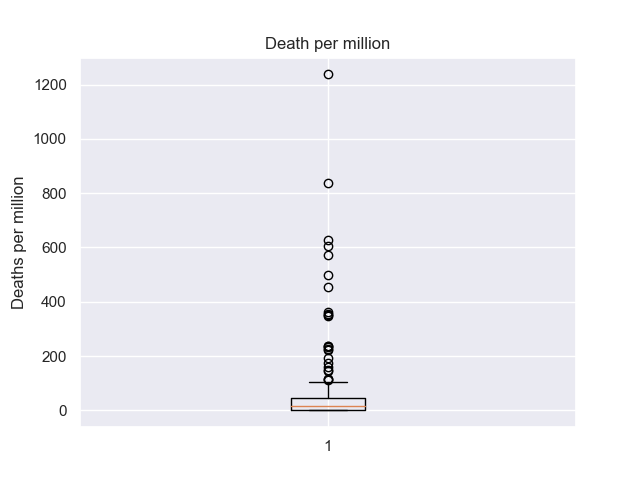

In [47]:
timest = list( sch_df['Total Deaths Per Million'])
figt, axt = plt.subplots()
axt.set_title('Death per million')
axt.set_ylabel('Deaths per million')
axt.boxplot(timest)
plt.show()

In [40]:





quartilest = sch_df['Total Deaths Per Million'].quantile([.25,.5,.75])
lowerqt = quartiles1[0.25]
upperqt = quartiles1[0.75]
iqrt = upperqt-lowerqt

lower_boundt = lowerqt - (1.5*iqrt)
upper_boundt = upperqt + (1.5*iqrt)

quartilest1 = sch_df['diabetes_prevalence'].quantile([.25,.5,.75])
lowerqt1 = quartilest1[0.25]
upperqt1 = quartilest1[0.75]
iqrt1 = upperqt1-lowerqt1

lower_boundt1 = lowerqt1 - (1.5*iqrt1)
upper_boundt1 = upperqt1 + (1.5*iqrt1)



tCleaned_df = sch_df.loc[( sch_df['Total Deaths Per Million']> lower_bound1)&
                        (sch_df['Total Deaths Per Million'] < upper_bound1)& 
                        (sch_df['diabetes_prevalence'] < upper_bound2)&
                       (sch_df['diabetes_prevalence'] > lower_bound2)& 
                       (sch_df['Income Level']!="NaN")]



tCleaned_df.head()

,Continent,Country,Date,Total Cases,New Cases,Total Deaths,Total Cases Per Million,Total Deaths Per Million,Total Test Per Thousands,Stringency Index,...,Aged 65 or older,GDP Per Capita,Covid Death Rate,diabetes_prevalence,Hospital Beds (per 10K people),Smoking Percetage,School Status,Latitude,Longitude,Income Level
7972,Oceania,Fiji,2020-06-21,18.0,0.0,0.0,20.079,0.000,NaN,NaN,...,6.224,8702.975,412.820,14.49,23.0,NaN,Closed,-17.7941,177.9783,Upper middle income
16892,North America,Nicaragua,2020-06-21,2014.0,0.0,64.0,304.020,9.661,NaN,NaN,...,5.445,5321.444,137.016,11.47,9.0,NaN,Open with limitations,12.6920,-85.0300,Lower middle income
18444,Asia,Philippines,2020-06-21,29400.0,941.0,1150.0,268.294,10.495,NaN,NaN,...,4.803,7599.188,370.437,7.07,5.0,NaN,Seasonal school closures,17.1810,121.2560,Lower middle income
9717,North America,Guatemala,2020-06-21,12755.0,246.0,514.0,711.951,28.690,NaN,NaN,...,4.694,7423.808,155.898,10.18,6.0,NaN,Closed,15.1240,-90.7110,Upper middle income
23921,Asia,United Arab Emirates,2020-06-21,44533.0,388.0,301.0,4502.649,30.434,NaN,NaN,...,1.144,67293.483,317.840,17.26,12.0,NaN,Closed,23.9299,53.9031,High income


<IPython.core.display.Javascript object>


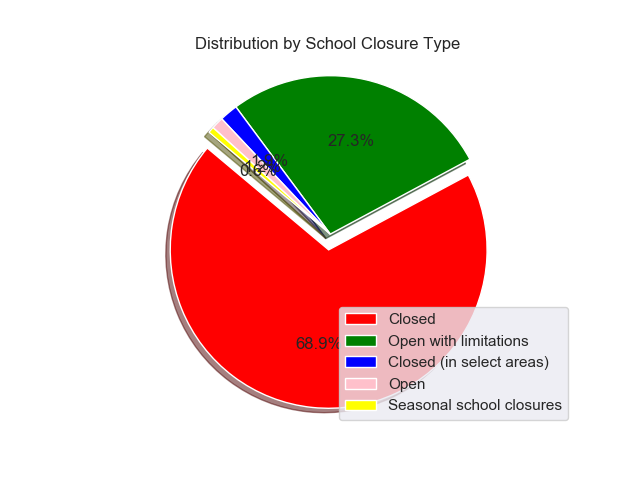

In [41]:
labelst= list(schooltype_df["Closure type"])
sizest =list(schooltype_df["School Status"])
colorst=["red", "green", "blue","pink","yellow"]
explodet=[0.1,0,0,0,0]
plt.pie(sizest, explode=explodet, colors=colorst,
        autopct="%1.1f%%", shadow=True, startangle=140, labeldistance=1.1
       )
plt.title("Distribution by School Closure Type")
plt.axis("equal")
plt.legend(labels, loc="lower right")
plt.show()
#plot Label


In [29]:
Open_df=comb.loc[(comb["School Status"]!="Closed") &(comb["Date"]!="2020-06-22")]
Closed_df=comb.loc[(comb["School Status"]=="Closed")&(comb["Date"]!="2020-06-22")]


In [30]:
Close_df=Closed_df[["Date", "Total Deaths Per Million"]]
Opened_df=Open_df[["Date", "Total Deaths Per Million"]]


In [48]:
Datet =list(comb["Date"].drop_duplicates())
Datet.remove("2020-06-22")
datest=Datet



<IPython.core.display.Javascript object>


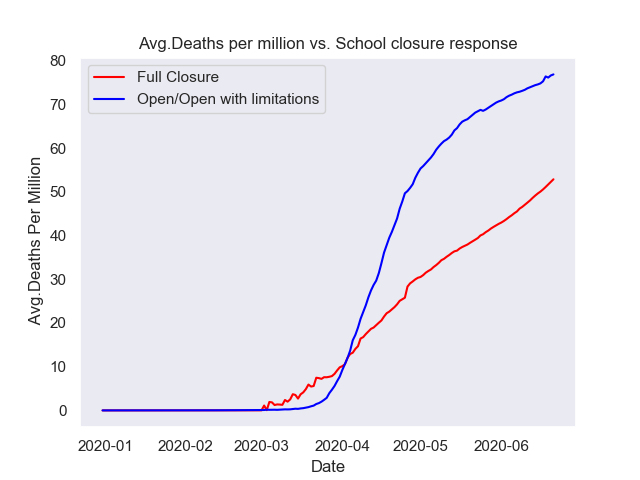

In [51]:
timet = [datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in datest]
Avdeatht =Close_df.groupby("Date").mean()
Avdeathts=Opened_df.groupby("Date").mean()
axt = plt.gca()
#get axes


formatter = mdates.DateFormatter("%Y-%m")
axt.xaxis.set_major_formatter(formatter)

locator = mdates.MonthLocator()
axt.xaxis.set_major_locator(locator)

Closed, =plt.plot(timet, Avdeatht, color="red", label="Full Closure")
Open, =plt.plot(timet, Avdeathts, color="blue", label="Open/Open with limitations")
plt.legend(handles=[Closed, Open], loc="best")

plt.ylabel(" Avg.Deaths Per Million")
plt.xlabel("Date")
plt.title("Avg.Deaths per million vs. School closure response")
plt.grid()
plt.show()



In [45]:

figt = px.scatter(tCleaned_df, x='diabetes_prevalence', y='Total Deaths Per Million',facet_col="Continent"
                 , hover_name="Country", trendline="ols", color="Continent",
                 labels={'diabetes_prevalence': "diabeties(%)"})
figt.update_layout(title='Diabetes Prevalence vs Total deaths per million')

figt.show()

<IPython.core.display.Javascript object>


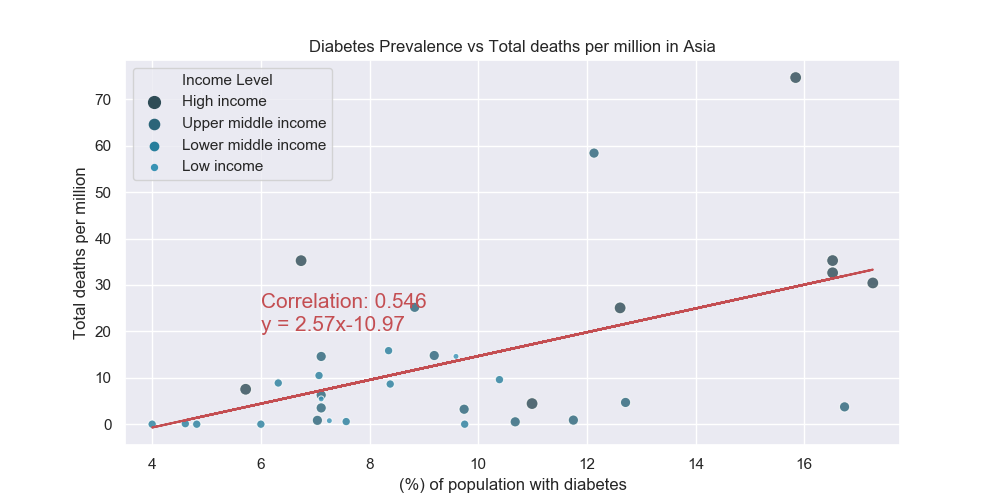

In [46]:



DB = tCleaned_df.loc[Cleaned_df["Continent"]=="Asia"]["diabetes_prevalence"]
TD = tCleaned_df.loc[Cleaned_df["Continent"]=="Asia"]['Total Deaths Per Million']
(slopet, interceptt, rvaluet, pvaluet, stderrt) = st.linregress(DB, TD)
regress_valuest = DB * slopet + interceptt
line_eq = "y = " + str(round(slopet,2)) + "x" + str(round(interceptt,2))
tCorrelation=f"Correlation: {round(rvaluet,3)}"
#plt.scatter(x_values,y_values, c=iris.target)
sns.set()
with sns.color_palette("PuBuGn_d"):
    plt.figure(figsize=(10,5))
    sns.scatterplot(x_values,y_values,hue=tCleaned_df["Income Level"], hue_order=["High income","Upper middle income",
                                             "Lower middle income","Low income"],alpha =0.8, 
                                    size=tCleaned_df["Income Level"], size_order=["High income","Upper middle income",
                                                                         "Lower middle income","Low income"],
                legend="brief" )
    plt.title("Diabetes Prevalence vs Total deaths per million in Asia")
    plt.plot(DB,regress_valuest,"r-")
    plt.xlabel("(%) of population with diabetes")
    plt.ylabel("Total deaths per million")
    plt.annotate(line_eq,(6,20),fontsize=15,color="r")
    plt.annotate(tCorrelation, (6, 25),fontsize=15,color="r")
    plt.xlim(DB.min()-0.5,DB.max()+0.5)
    
    plt.show()
